In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import pygraphviz
from pandas import read_csv
import seaborn as sns
import lightgbm as lgb

from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier

from lightgbm import LGBMClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from utils.machine_learning.trainer import MLClassifier
import os

In [2]:
from utils.machine_learning.data_loader import ml_load_species

# Helper Functions

In [3]:
def aggregate_sequences(list_of_bacteria, data_type):
    if data_type == 'B':
        columns = 12
    elif data_type == 'C':
        columns = 10
    elif data_type == 'D':
        columns = 4
    elif data_type == 'E':
        columns = 8
    else:
        raise ValueError(f'Unknown data type {data_type}')
    X_agg= np.array([]).reshape(0,columns)
    y_agg = np.array([]).reshape(0,)
    for i in list_of_bacteria:
        X,y = ml_load_species(i, data_type)
        X_agg = np.concatenate([X, X_agg], axis = 0)
        y_agg = np.concatenate([y, y_agg], axis = 0)
        
    return X_agg,y_agg

# Phylum: Firmicutes

In [4]:
# list of Firmicutes in HGT-DB
list_train_firmicutes = [
    'cglu',
    'mtub',
    'mtub2',
    'mlep',
    'scoel',
    'bsub',
    'bhal',
    'linno',
    'lmono',
    'sau2',
    'sau1',
    'sau3',
    'llac',
    'spyo',
    'spyo2',
    'spneu1',
    'spneu2',
    'caceto',
]
list_test_firmicutes = [
    'cperf',
    'tteng',
    'mgen',
    'mpneu',
    'mpul',
    'uure'
]


In [5]:
X_train_array_Firmicutes, y_train_array_Firmicutes = aggregate_sequences(list_train_firmicutes, 'E')
X_test_array_Firmicutes, y_test_array_Firmicutes = aggregate_sequences(list_test_firmicutes, 'E')

In [6]:
print(X_train_array_Firmicutes.shape)
print(y_train_array_Firmicutes.shape)
print(X_test_array_Firmicutes.shape)
print(y_test_array_Firmicutes.shape)

(51339, 8)
(51339,)
(7817, 8)
(7817,)


In [7]:
# init model and init classifier
HGT_Firmicutes_E_lgbm = MLClassifier(LGBMClassifier())

# train and eval
HGT_Firmicutes_E_lgbm.train(X_train_array_Firmicutes, y_train_array_Firmicutes)
HGT_Firmicutes_E_lgbm.eval(X_test_array_Firmicutes, y_test_array_Firmicutes)
HGT_Firmicutes_E_lgbm.get_precision(X_test_array_Firmicutes, y_test_array_Firmicutes)
HGT_Firmicutes_E_lgbm.get_roc_auc(X_test_array_Firmicutes, y_test_array_Firmicutes)

[[7127  142]
 [ 408  140]]
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96      7269
         1.0       0.50      0.26      0.34       548

    accuracy                           0.93      7817
   macro avg       0.72      0.62      0.65      7817
weighted avg       0.91      0.93      0.92      7817

prec: 0.49645390070921985
roc_auc: 0.909250536976843


# Phylum: Proteobacteria

In [8]:
list_train_proteobacteria = [
    'ccres',
    'bmelic1',
    'bmelic2',
    'mloti',
    'smel',
    'atum1c1',
    'atum1c2',
    'atum2c1',
    'atum2c2',
    'rpxx',
    'rconorii',
    'nmen1',
    'nmen2',
    'rsola',
    'rsolac2',
    'cjen',
    'hpyl',
    'hpyl99',
    'baphi',
    'bsp',
    'ecoli',
    'ecoli2'
]
list_test_proteobacteria= [
    'ecoli3',
    'sent',
    'styp',
    'ypestis',
    'hinf',
    'pmul',
    'paer',
    'vcolc1',
    'vcolc2',
    'vvul1c1',
    'vvul1c2',
    'vvul2c1',
    'vvul2c2',
    'xcamp',
    'xcitri',
    'xfas'
]

In [9]:
X_train_proteobacteria, y_train_proteobacteria = aggregate_sequences(list_train_proteobacteria, 'E')
X_test_proteobacteria, y_test_proteobacteria = aggregate_sequences(list_test_proteobacteria, 'E')

[[46075   883]
 [ 3143  1840]]
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96     46958
         1.0       0.68      0.37      0.48      4983

    accuracy                           0.92     51941
   macro avg       0.81      0.68      0.72     51941
weighted avg       0.91      0.92      0.91     51941

prec: 0.6757253029746603
roc_auc: 0.9351303567954548


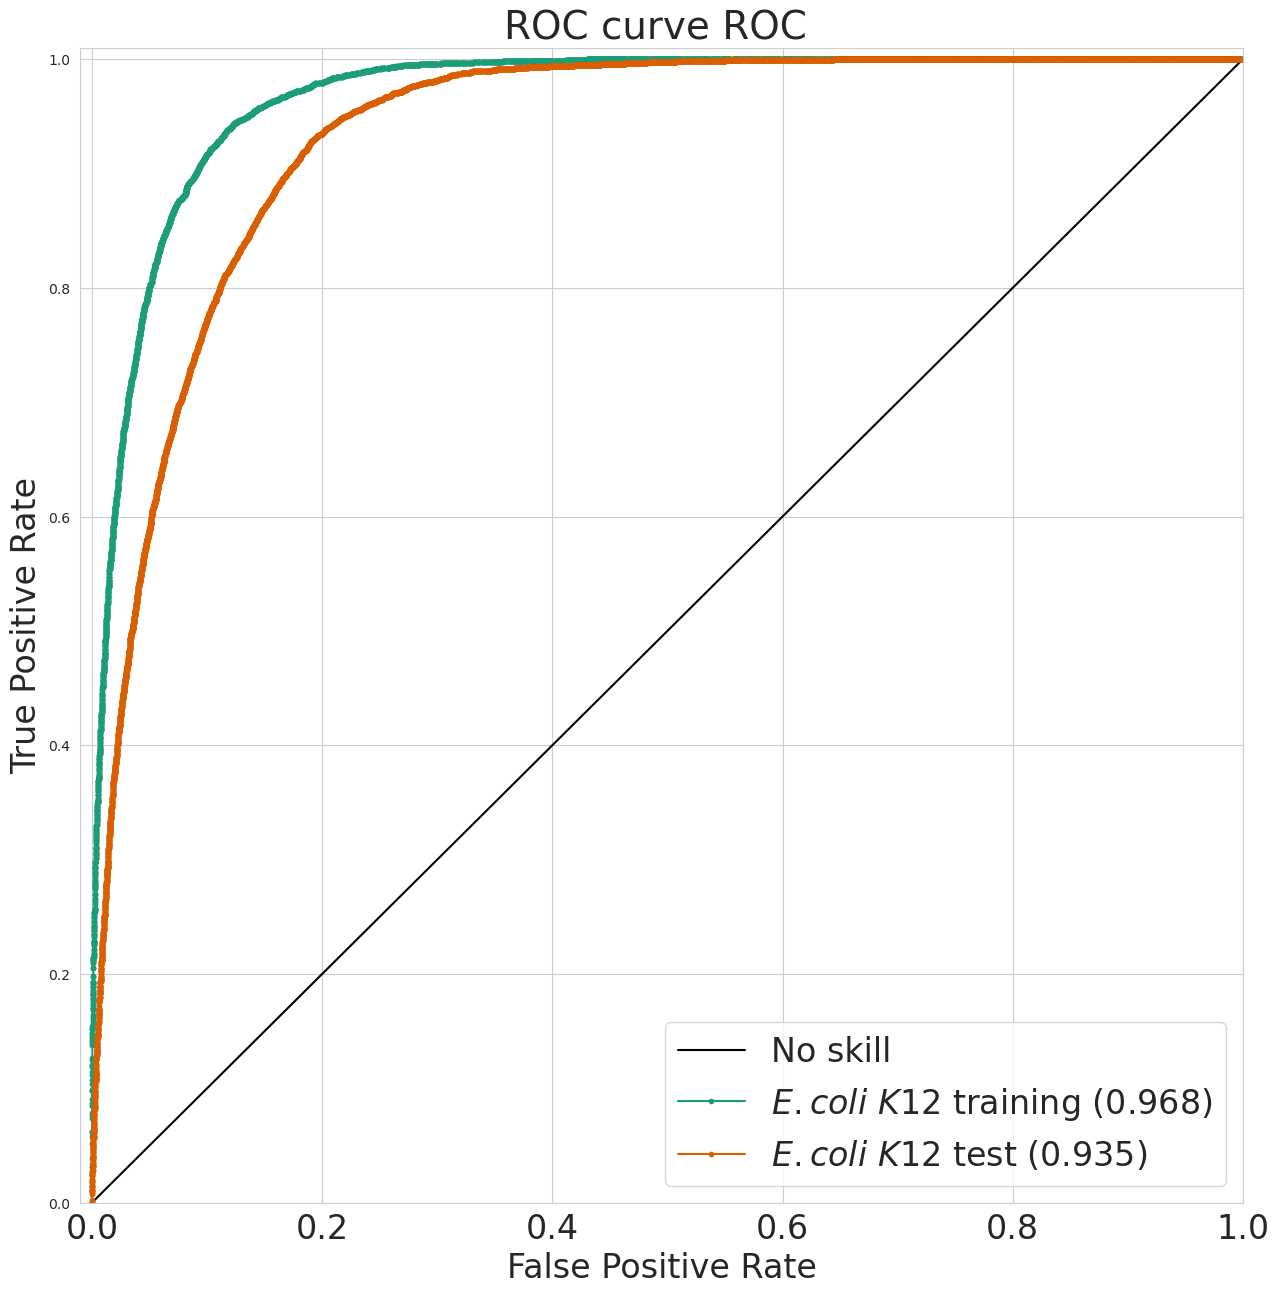

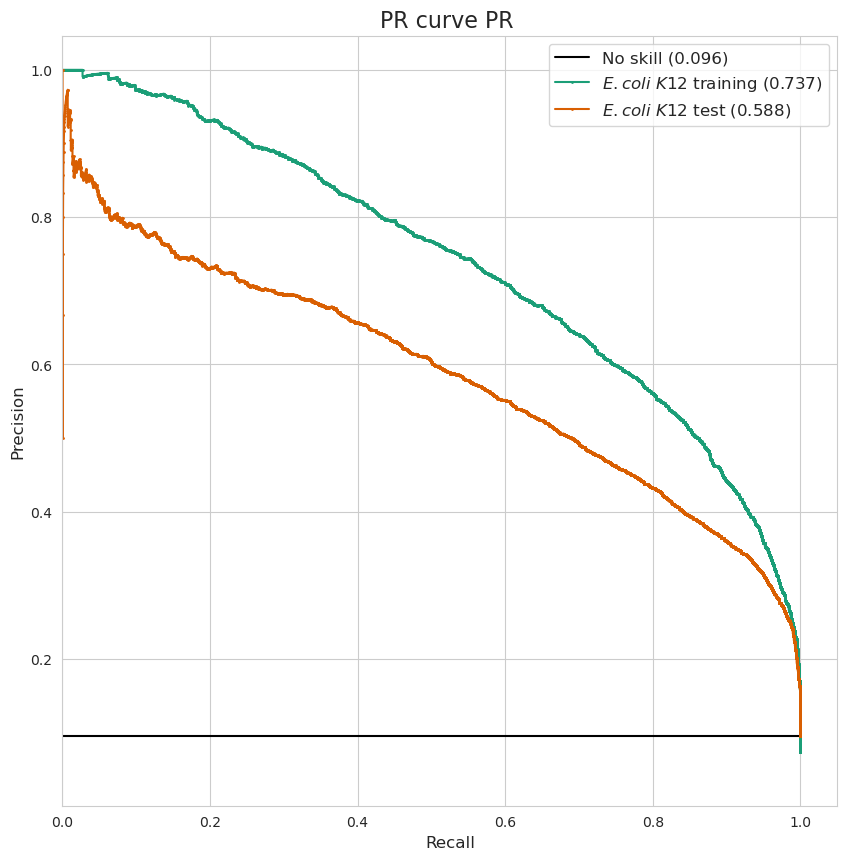

In [12]:
# init model and init classifier
HGT_Proteobacteria_E_lgbm = MLClassifier(LGBMClassifier())

# train and eval
HGT_Proteobacteria_E_lgbm.train(X_train_proteobacteria, y_train_proteobacteria)
HGT_Proteobacteria_E_lgbm.eval(X_test_proteobacteria, y_test_proteobacteria)
HGT_Proteobacteria_E_lgbm.get_precision(X_test_proteobacteria, y_test_proteobacteria)
HGT_Proteobacteria_E_lgbm.get_roc_auc(X_test_proteobacteria, y_test_proteobacteria)
HGT_Proteobacteria_E_lgbm.plot(X_train_proteobacteria,y_train_proteobacteria, X_test_proteobacteria, y_test_proteobacteria)

In [11]:
HGT_Proteobacteria_E_lgbm.eval(X_test_array_Firmicutes, y_test_array_Firmicutes)

[[7171   98]
 [ 473   75]]
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      7269
         1.0       0.43      0.14      0.21       548

    accuracy                           0.93      7817
   macro avg       0.69      0.56      0.58      7817
weighted avg       0.90      0.93      0.91      7817



# Phylum: Pirochaetales